## Problem 1

## a)

## 1.

In [27]:
import pandas as pd
import numpy as np

# Load the stock price data
price_data = pd.read_csv('SP500_close_price_no_missing.csv', index_col=0)  # Assuming the first column is the index

# Calculate log returns
log_returns = np.log(price_data / price_data.shift(1))

log_returns.dropna(inplace=True)
# Display the derived log returns
print(log_returns.head())


                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-04 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-05  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-06 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-07  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-10  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   

                 AES       AET       AFL         A  ...       WYN      WYNN  \
date                                                ...                       
2011-01-04  0.004773  0.005141 -0.018417 -0.009356  ... -0.006214  0.030719   
2011-01-05  0.013402  0.009569 -0.001949 -0.002172  ... -0.003286  0.012819   
2011-01-06  0.017081  0.018557 -0.005514  0.001931  ... -0.014589  0.007264   
2011-01-07  0.000000  0.002179 -0.003931  0.003369  ... -0.003681  0.034794   
2011-01

## 2 

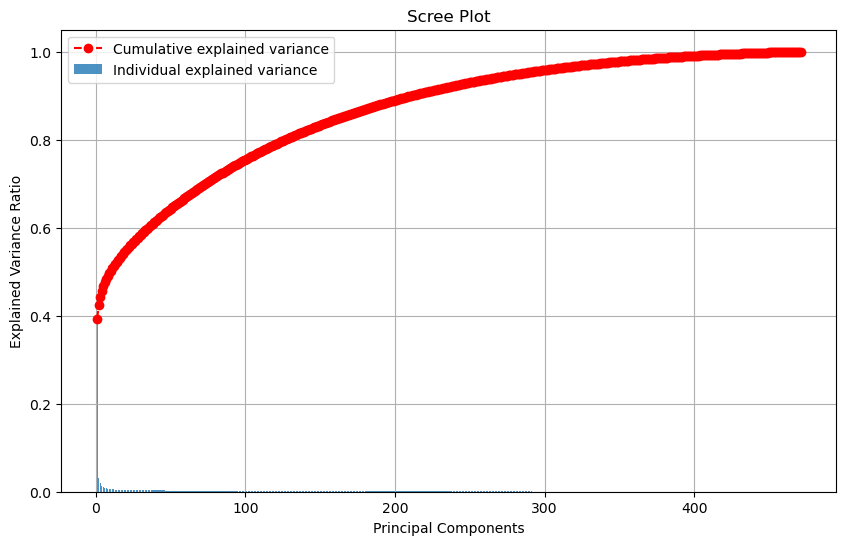

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the log returns
scaler = StandardScaler()
log_returns_standardized = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(log_returns_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='r', label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()


## 3 

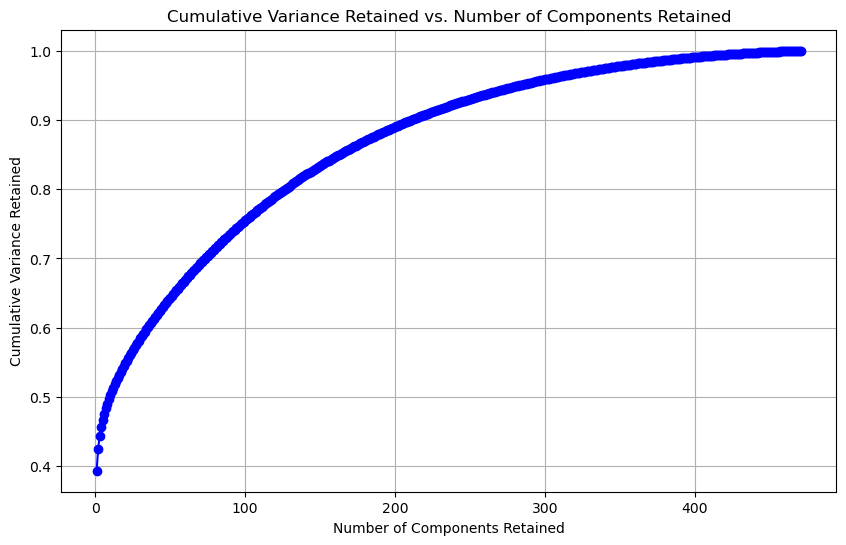

In [30]:
# Number of principal components to consider
num_components = len(explained_variance_ratio)

# Calculate cumulative variance retained for top N components
cumulative_variances = [np.sum(explained_variance_ratio[:i+1]) for i in range(num_components)]

# Plot cumulative variance retained
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), cumulative_variances, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components Retained')
plt.ylabel('Cumulative Variance Retained')
plt.title('Cumulative Variance Retained vs. Number of Components Retained')
plt.grid()
plt.show()


## 4

In [31]:
# Find the number of components required to capture at least 80% variance
variance_threshold = 0.8  # Set the threshold for variance retention
components_needed = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1

print(f"To capture at least 80% of the total variance, {components_needed} principal components are needed.")


To capture at least 80% of the total variance, 127 principal components are needed.


## b)

## 1

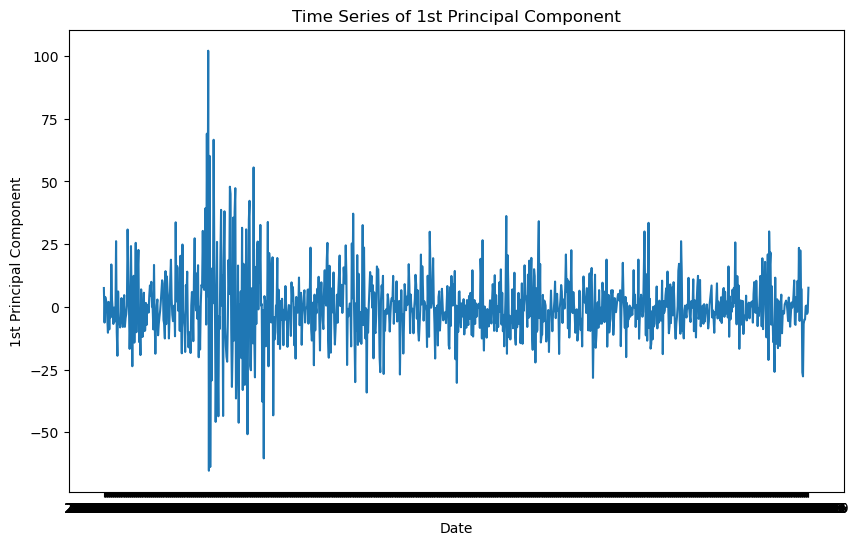

In [33]:
# Assuming pca is your fitted PCA model
first_pc_time_series = np.dot(log_returns_standardized, pca.components_[0])

# Ensure the dimensions match the index length
if len(first_pc_time_series) != len(stock_prices.index):
    first_pc_time_series = first_pc_time_series[:-1]  # Trim one element from the time series if mismatched

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(stock_prices.index[:len(first_pc_time_series)], first_pc_time_series)
plt.xlabel('Date')
plt.ylabel('1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.show()


In [34]:
lowest_value_date = stock_prices.index[np.argmin(first_pc_time_series)]
print(f"The date with the lowest value for the 1st component: {lowest_value_date}")

The date with the lowest value for the 1st component: 2011-08-08


## 2

In [36]:
# Extract weights from the PCA model
weights_first_pc = pca.components_[0]  # Weights for the 1st principal component
weights_second_pc = pca.components_[1]  # Weights for the 2nd principal component

print(weights_first_pc)
print(weights_second_pc)

[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.04757012 -0.04481407 -0.04513718 -0.0479769  -0.

## 3

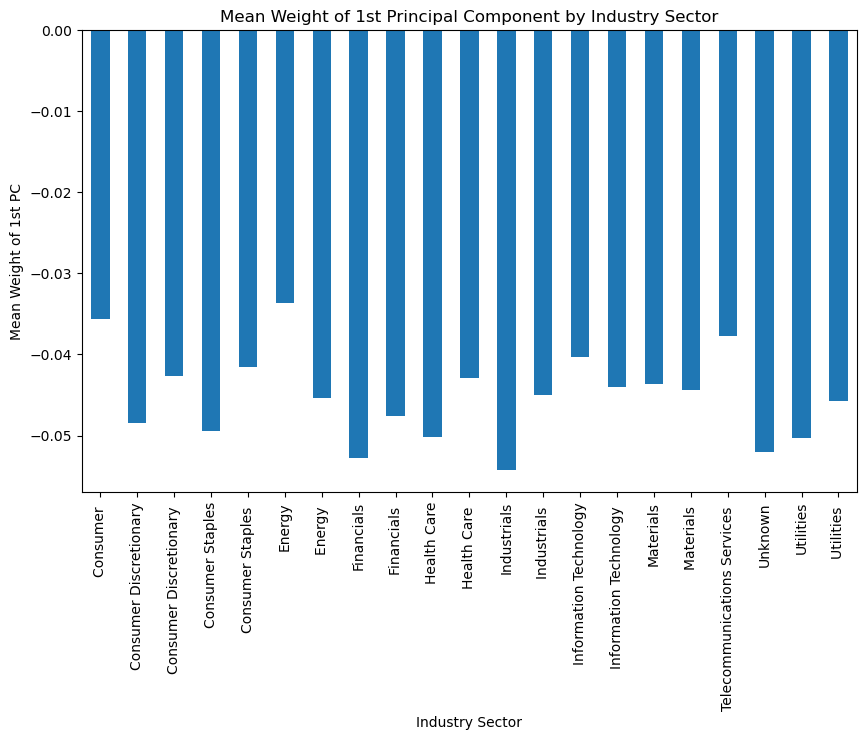

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
ticker_data = pd.read_csv('SP500_ticker.csv', encoding='latin1')
# Assuming you have the weights of the 1st principal component stored in a variable named weights_first_pc


# Convert weights_first_pc to a DataFrame with a column named 'Weight'
weights_df = pd.DataFrame({'Weight': weights_first_pc})

# Merge ticker information with weights
merged_data = pd.concat([ticker_data, weights_df], axis=1, join='inner')

# Plotting
plt.figure(figsize=(10, 6))
merged_data.groupby('sector')['Weight'].mean().plot(kind='bar')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 1st PC')
plt.title('Mean Weight of 1st Principal Component by Industry Sector')
plt.show()

## 4

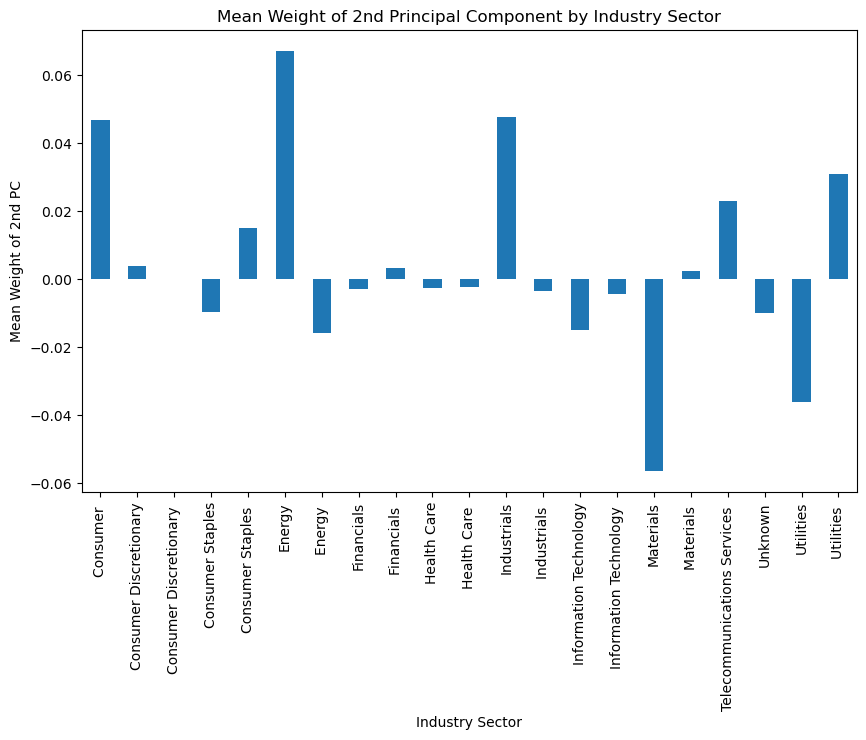

In [54]:
# Convert weights_first_pc to a DataFrame with a column named 'Weight'
weights_df_second = pd.DataFrame({'Weight': weights_second_pc})

# Merge ticker information with weights
merged_data = pd.concat([ticker_data, weights_df_second], axis=1, join='inner')

# Plotting
plt.figure(figsize=(10, 6))
merged_data.groupby('sector')['Weight'].mean().plot(kind='bar')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 2nd PC')
plt.title('Mean Weight of 2nd Principal Component by Industry Sector')
plt.show()

## c

In [59]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     --- ------------------------------------ 0.2/2.9 MB 4.6 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/2.9 MB 10.8 MB/s eta 0:00:01
     -------------------------- ------------- 2.0/2.9 MB 15.8 MB/s eta 0:00:01
     ---------------------------------------  2.9/2.9 MB 17.0 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requi

In [62]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define a list of stock tickers to fetch data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']  # Add more tickers as needed

# Exclude 'FB' ticker
tickers.remove('FB')

# Fetch stock price data for remaining valid tickers
stock_data = yf.download(tickers, start='2023-01-01', end='2023-11-27')['Adj Close']

# Drop any columns (tickers) with missing values
stock_data.dropna(axis=1, inplace=True)

# Transpose the data to have dates as rows and stocks as columns
stock_data = stock_data.transpose()

# Convert stock_data to a numpy array for StandardScaler
stock_data_array = stock_data.values  # Convert DataFrame to numpy array

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stock_data_array)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Obtain transformed data using PCA
pca_transformed = pca.transform(scaled_data)

# Retrieve explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance ratio for each principal component
print("Explained Variance Ratio:")
print(explained_variance_ratio)

[*********************100%%**********************]  4 of 4 completed
Explained Variance Ratio:
[9.96715248e-01 2.66159396e-03 6.23157877e-04 5.15245381e-33]


## Problem 2

In [63]:
df=pd.read_csv("BMI.csv")

In [64]:
df.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


## a

In [65]:
import statsmodels.api as sm

# Separate predictors (X) and target variable (y)
X = df.drop(columns=['fatpctg'])
y = df['fatpctg']

# Function for forward stepwise selection
def forward_selection(X, y):
    features = list(X.columns)
    selected_features = []
    while len(features) > 0:
        remaining_features = list(set(features) - set(selected_features))
        best_pvalue = 1  # Initialize with a high p-value
        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvalue = model.pvalues[feature]
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        if best_pvalue < 0.05:  # Using 0.05 as the significance level
            selected_features.append(best_feature)
        else:
            break
    return selected_features

# Function for backward stepwise selection
def backward_selection(X, y):
    features = list(X.columns)
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        max_pvalue = model.pvalues.drop('const').max()
        if max_pvalue >= 0.05:  # Using 0.05 as the significance level
            remove_feature = model.pvalues.drop('const').idxmax()
            features.remove(remove_feature)
        else:
            break
    return features

# Perform forward selection
selected_features_forward = forward_selection(X, y)
print("Forward Stepwise Selection - Selected Features:", selected_features_forward)

# Perform backward selection
selected_features_backward = backward_selection(X, y)
print("Backward Stepwise Selection - Selected Features:", selected_features_backward)


Forward Stepwise Selection - Selected Features: ['Abdomen', 'Weight', 'Wrist', 'Forearm']
Backward Stepwise Selection - Selected Features: ['Age', 'Neck', 'Abdomen', 'Hip', 'Thigh', 'Forearm', 'Wrist']


## b

In [66]:
# Calculate correlations between input variables and output variable
correlations = df.drop(columns=['fatpctg']).corrwith(df['fatpctg'])

# Sort correlations in descending order to get a ranking
correlation_ranking = correlations.abs().sort_values(ascending=False)

print("Ranking of features based on correlation with 'fatpctg':")
print(correlation_ranking)


Ranking of features based on correlation with 'fatpctg':
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
dtype: float64


## c - Lasso 

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Separate predictors (X) and target variable (y)
X = df.drop(columns=['fatpctg'])
y = df['fatpctg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)  # You can tune the alpha parameter for desired regularization
lasso.fit(X_train_scaled, y_train)

# Retrieve coefficients and corresponding feature names
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
lasso_coefficients['Absolute Coefficient'] = abs(lasso_coefficients['Coefficient'])

# Sort features based on absolute coefficient values
lasso_coefficients = lasso_coefficients.sort_values(by='Absolute Coefficient', ascending=False)
print("Lasso Regression - Feature Coefficients:")
print(lasso_coefficients)


Lasso Regression - Feature Coefficients:
    Feature  Coefficient  Absolute Coefficient
5   Abdomen     8.433105              8.433105
12    Wrist    -1.896782              1.896782
0       Age     0.818081              0.818081
3      Neck    -0.614401              0.614401
1    Weight    -0.564124              0.564124
10   Biceps     0.531767              0.531767
2    Height    -0.423096              0.423096
11  Forearm     0.175674              0.175674
7     Thigh     0.086877              0.086877
4     Chest    -0.000000              0.000000
6       Hip    -0.000000              0.000000
8      Knee     0.000000              0.000000
9     Ankle     0.000000              0.000000


## c- Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
random_forest = RandomForestRegressor(random_state=42)

# Fit the model
random_forest.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nRandom Forest - Feature Importances:")
print(feature_importances)



Random Forest - Feature Importances:
    Feature  Importance
5   Abdomen    0.731153
2    Height    0.029401
1    Weight    0.029395
12    Wrist    0.026041
8      Knee    0.023688
3      Neck    0.023267
6       Hip    0.022485
0       Age    0.022080
7     Thigh    0.020623
4     Chest    0.020444
9     Ankle    0.019897
10   Biceps    0.017453
11  Forearm    0.014072
